In [1]:
# importing libraries 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import numpy.random as nr 
import math 

%matplotlib inline 

In [2]:
# loading data 
customer_info = pd.read_csv('Data/AdvWorksCusts.csv')
customer_spending = pd.read_csv('Data/AW_AveMonthSpend.csv')
customer_has_bike = pd.read_csv('Data/AW_BikeBuyer.csv')

In [3]:
# checking for duplicate and removing them 
print("For customer_info: " + "\n")
print(customer_info.shape)
print(customer_info.CustomerID.unique().shape)
print("\n" + "For customer_spending" + "\n")
print(customer_spending.shape)
print(customer_spending.CustomerID.unique().shape)
print("\n" + "For customer_has_bike" + "\n")
print(customer_has_bike.shape)
print(customer_has_bike.CustomerID.unique().shape)

# dropping duplicate if they exist 
customer_info.drop_duplicates(subset='CustomerID',keep='last', inplace=True)
customer_spending.drop_duplicates(subset='CustomerID',keep='last',inplace=True)
customer_has_bike.drop_duplicates(subset='CustomerID',keep='last',inplace=True)

# checking if duplicate are dropped
print("For customer_info: " + "\n")
print(customer_info.shape)
print(customer_info.CustomerID.unique().shape)
print("\n" + "For customer_spending" + "\n")
print(customer_spending.shape)
print(customer_spending.CustomerID.unique().shape)
print("\n" + "For customer_has_bike" + "\n")
print(customer_has_bike.shape)
print(customer_has_bike.CustomerID.unique().shape)


For customer_info: 

(16519, 23)
(16404,)

For customer_spending

(16519, 2)
(16404,)

For customer_has_bike

(16519, 2)
(16404,)
For customer_info: 

(16404, 23)
(16404,)

For customer_spending

(16404, 2)
(16404,)

For customer_has_bike

(16404, 2)
(16404,)


In [4]:
# checking for null or missign values in all datasets 
print((customer_info.astype(np.object).isnull()).any())
print((customer_spending.astype(np.object).isnull().any()))
print((customer_has_bike.astype(np.object).isnull().any()))

CustomerID              False
Title                    True
FirstName               False
MiddleName               True
LastName                False
Suffix                   True
AddressLine1            False
AddressLine2             True
City                    False
StateProvinceName       False
CountryRegionName       False
PostalCode              False
PhoneNumber             False
BirthDate               False
Education               False
Occupation              False
Gender                  False
MaritalStatus           False
HomeOwnerFlag           False
NumberCarsOwned         False
NumberChildrenAtHome    False
TotalChildren           False
YearlyIncome            False
dtype: bool
CustomerID       False
AveMonthSpend    False
dtype: bool
CustomerID    False
BikeBuyer     False
dtype: bool


Doing some exploratory analysis once the data is cleaned 

In [5]:
print(round(customer_info.describe(),2))
print("\n")
print(round(customer_spending.describe(),2))
print("\n")
print(round(customer_has_bike.describe(),2))

       CustomerID  HomeOwnerFlag  NumberCarsOwned  NumberChildrenAtHome  \
count    16404.00       16404.00         16404.00              16404.00   
mean     20240.14           0.67             1.50                  0.99   
std       5340.37           0.47             1.14                  1.51   
min      11000.00           0.00             0.00                  0.00   
25%      15617.75           0.00             1.00                  0.00   
50%      20231.50           1.00             2.00                  0.00   
75%      24862.25           1.00             2.00                  2.00   
max      29482.00           1.00             4.00                  5.00   

       TotalChildren  YearlyIncome  
count       16404.00      16404.00  
mean            2.00      78129.67  
std             1.68      39728.38  
min             0.00       9482.00  
25%             0.00      47808.75  
50%             2.00      76125.00  
75%             3.00     105211.75  
max             5.00     196

In [6]:
#merging data customer_info data and customer_spending data for modeling 
data = customer_info.merge(customer_spending, on='CustomerID', how='left')
data.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,Bachelors,Professional,M,M,1,0,0,2,137947,89
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,Bachelors,Professional,M,S,0,1,3,3,101141,117
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,Bachelors,Professional,M,M,1,1,3,3,91945,123
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,Bachelors,Professional,F,S,0,1,0,0,86688,50
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,Bachelors,Professional,F,S,1,4,5,5,92771,95


#### Below function is useful but I prefer you use the other
#### because its simple

In [7]:
from datetime import datetime 
from dateutil.parser import parse

def generate_age(data, format):
    collect_date = birthday = datetime(1998,1,1,0,0,0)
    age = [] 
    for index, row in data.iterrows():
        cust_date = datetime.strptime(row['BirthDate'], format)
        age.append(int((collect_date - cust_date).days/365))
    return age 


In [8]:
data['Age'] = generate_age(data, '%Y-%m-%d')
data[['BirthDate','Age']].head()

,BirthDate,Age
0,1966-04-08,31
1,1965-05-14,32
2,1965-08-12,32
3,1968-02-15,29
4,1968-08-08,29


#### generating age since we given the birthrate 
#### This function for generating age work but it not safe since it does work with one form of format.
from datetime import datetime 
from datetime import date
def calcute_age(age):
    cust_date = datetime.strptime(age, "%Y-%m-%d")
    f_date = date(1998,1,1)
    return f_date.year - cust_date.year - ((f_date.month, f_date.day) <(cust_date.month, cust_date.day))
data['Age'] = data['BirthDate'].apply(calcute_age)

data[['BirthDate','Age']].head()

In [9]:
def plot_scatter(auto_prices, cols, col_y= 'AveMonthSpend'):
    for col in cols:
        fig = plt.figure(figsize=(7,6)) # define plot area 
        ax = fig.gca() # define axis 
        auto_prices.plot.scatter(x= col, y=col_y, ax= ax)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) #title of the plot
        ax.set_xlabel(col) #set x axis text
        ax.set_ylabel(col_y) #set y axis text
        plt.show()

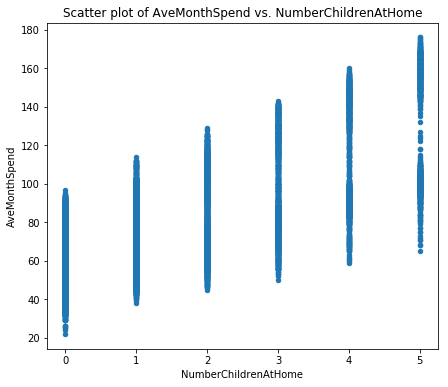

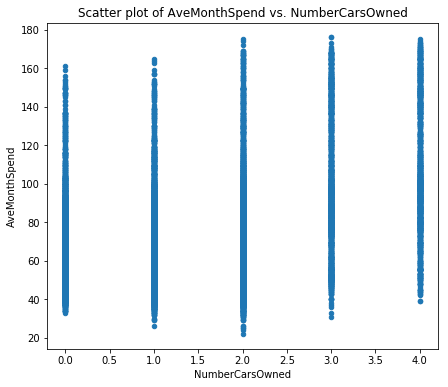

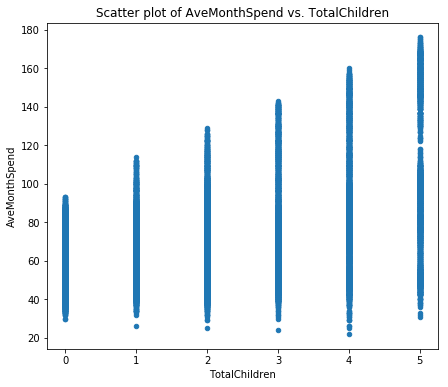

In [10]:
cols=['NumberChildrenAtHome','NumberCarsOwned','TotalChildren']
plot_scatter(data,cols)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/usr/lib/python3/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


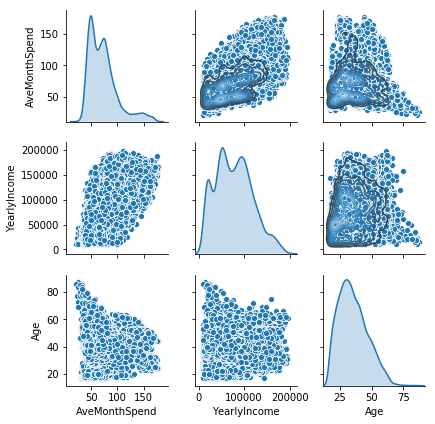

In [11]:
cols= ['AveMonthSpend','YearlyIncome','Age']
sns.pairplot(data[cols], palette="Set2", diag_kind="kde", size=2).map_upper(sns.kdeplot,cmap="Blues_d")

In [12]:
def plot_box(auto_prices, cols, col_y='AveMonthSpend'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col,col_y, data=auto_prices) 
        plt.xlabel(col) #set x axis text
        plt.ylabel(col_y) #set y axis text 
        plt.show()

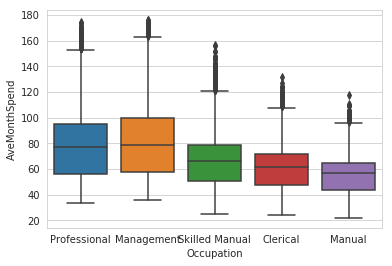

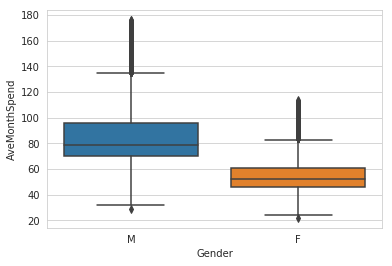

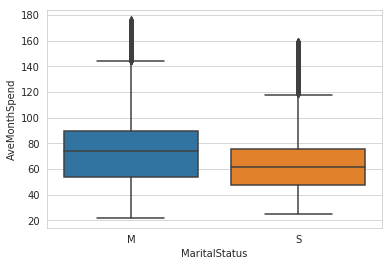

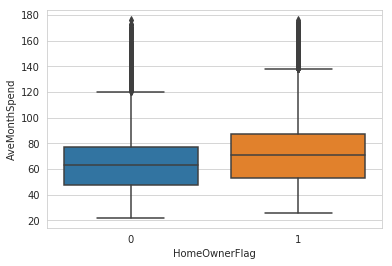

In [13]:
cols= ['Occupation','Gender','MaritalStatus','HomeOwnerFlag']
plot_box(data, cols)

After visualizations above we selected the following features for model: Gender, MaritalStatus, HomeOwnerFlag, Occupation, Age, YearlyIncme and NumberChildrenAtHome

In [14]:
# Grouping Categorical and numerical data 
categorical_features= ['Gender','MaritalStatus','HomeOwnerFlag','Occupation']
numeric_features= ['Age','YearlyIncome','NumberChildrenAtHome']

In [15]:
# define encoder for categorical 
from sklearn import preprocessing
import sklearn.model_selection as ms 
from sklearn import linear_model
import sklearn.metrics as sklm

def encode_string(cat_features):
    enc= preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features= enc.transform(cat_features)
    ohe= preprocessing.OneHotEncoder()
    encoded= ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

In [16]:
def encode_cat_features(features):
    categorical_features= ['Gender','MaritalStatus','HomeOwnerFlag']
    f= encode_string(features['Occupation'])
    for cat in categorical_features:
        enc= encode_string(features[cat])
        f= np.concatenate([f,enc],1)
    return f

In [17]:
labels = np.array(data.AveMonthSpend)
selected = numeric_features + categorical_features
features = data[selected]
print(labels)
print(features.head())

[ 89 117 123 ...  79  65  68]
   Age  YearlyIncome  NumberChildrenAtHome Gender MaritalStatus  \
0   31        137947                     0      M             M   
1   32        101141                     3      M             S   
2   32         91945                     3      M             M   
3   29         86688                     0      F             S   
4   29         92771                     5      F             S   

   HomeOwnerFlag    Occupation  
0              1  Professional  
1              0  Professional  
2              1  Professional  
3              0  Professional  
4              1  Professional  


In [18]:
#encoding features 
encoded_features= encode_cat_features(features)
print(encoded_features[:,:])
#selecting numeric features and converting them to array
numeric_features= np.array(data[numeric_features])
print(numeric_features[:,:])

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 1. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 1.]]
[[    31 137947      0]
 [    32 101141      3]
 [    32  91945      3]
 ...
 [    58 133053      0]
 [    51  31930      0]
 [    52  59382      0]]


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a Lab

In [19]:
# Combining numeric and encoded features into 1 feature 
features= np.concatenate([encoded_features,numeric_features],1)
print(features.shape)
print(features[:1,:])

(16404, 14)
[[0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00
  1.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 3.10000e+01
  1.37947e+05 0.00000e+00]]


In [20]:
# spliting data into training and test datasets 
nr.seed(9988)
indx= range(features.shape[0])
indx= ms.train_test_split(indx, test_size= 300)
X_train= features[indx[0],:]
y_train= np.ravel(labels[indx[0]])
X_test= features[indx[1],:]
y_test= np.ravel(labels[indx[1]])

In [21]:

# Scaling the data to avoid features having different magnitudes 
#scalar= preprocessing.MinMaxScaler(feature_range=(-1,1)).fit(X_train[:,11:])
scaler = preprocessing.StandardScaler().fit(X_train[:,11:13])
X_train[:,11:13] = scaler.transform(X_train[:,11:13])
X_test[:,11:13] = scaler.transform(X_test[:,11:13])
X_train[:2]

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  1.        ,
         0.        , -0.04218537, -0.96803832,  0.        ],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  1.        ,
         0.        , -0.48707941,  2.37320265,  0.        ]])

Now Features are prepared we try it on models 

In [22]:
# using the linear regression model to define and fit

In [23]:
lin_mod= linear_model.Ridge(alpha = 0.05)
lin_mod.fit(X_train,y_train)
print(lin_mod.intercept_)
print(lin_mod.coef_)

60.84370494780248
[ 6.62453133e-01 -2.17172381e+00 -1.79250561e-01  8.84114274e-01
  8.04406961e-01 -1.40857718e+01  1.40857718e+01  3.09843371e+00
 -3.09843371e+00  3.71975025e-03 -3.71975028e-03 -1.24172260e+00
  8.20152838e+00  1.10719302e+01]


In [24]:
# tunning the model to fine the best alpha 
alphas = np.array([0.1,0.01,0.001,0.0001,0,0.01,0.05,0.04,0.03,0.02,1,2,3,4,5,6,7,8,9,10])
lin_mod= linear_model.Ridge()
linRidge_clf = ms.GridSearchCV(estimator=lin_mod, param_grid=dict(alpha=alphas))
linRidge_clf.fit(X_train,y_train)
#summarize results of grid search 
print(linRidge_clf.best_score_)
print(linRidge_clf.best_estimator_.alpha)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.9459672317634047
3.0


In [25]:
# fitting the alpa value into the model.
lin_mod= linear_model.Ridge(alpha = 3.0)
lin_mod.fit(X_train,y_train)
print(lin_mod.intercept_)
print(lin_mod.coef_)

60.84421760308023
[ 6.59621956e-01 -2.16533531e+00 -1.82820198e-01  8.85518088e-01
  8.03015464e-01 -1.40810939e+01  1.40810939e+01  3.09746333e+00
 -3.09746333e+00  3.24850901e-03 -3.24850901e-03 -1.24213121e+00
  8.19896041e+00  1.10711523e+01]


In [26]:
# function to calcuclate the matrices
def print_metrics(y_true, y_predicted):
    # compute R^2 and the adjusted R^2
    r2= sklm.r2_score(y_true,y_predicted)
    n= X_test.shape[0]
    p= X_test.shape[1]-1
    r2_adj= 1-(1-r2)*((n-1)/(n-p-1))
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj)) 

In [27]:
# function to calculate accuracy 
def print_evalute(y_true_, y_predicted_):
    errors= abs(y_predicted_ - y_true_)
    mape_= 100* np.mean(errors/y_true_)
    accuracy= 100 - mape_
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy= {:0.2f}%.'.format(accuracy))
    

In [28]:
# predict and run metric 
scores= lin_mod.predict(X_test) 
print_metrics(y_test, scores)
print_evalute(y_test, scores)

Mean Square Error      = 34.300889201469865
Root Mean Square Error = 5.856696099463405
Mean Absolute Error    = 4.394083754414235
Median Absolute Error  = 3.3884315387464348
R^2                    = 0.9522663978047706
Adjusted R^2           = 0.9500966886140784
Model Performance
Average Error: 4.3941 degrees.
Accuracy= 93.28%.


/usr/lib/python3/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


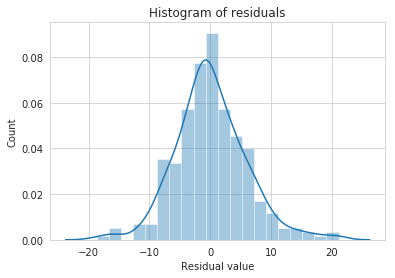

In [29]:
# function to compute for the residuals 
def hist_residue(y_test, y_score):
    ## compute vector of residuals
    residue = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    # making a plot 
    sns.distplot(residue)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('Count')
    plt.show()
    
hist_residue(y_test,scores)

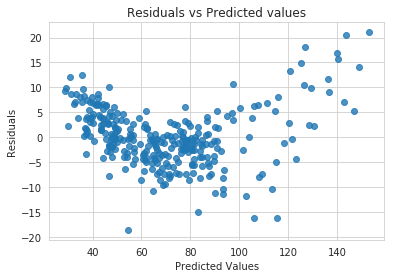

In [30]:
def plot_residue(y_test, y_score):
    ## compute vector of residuals
    residue = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    # making a plot 
    sns.regplot(y_score, residue, fit_reg= False)
    plt.title('Residuals vs Predicted values')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()

plot_residue(y_test,scores)
    

The residual are not normally distrubuted as expected. Also there is a pattern for lower Average residuals. This indicate the model is not generalize as expected. 

Mean Square Error      = 7.956054222480307
Root Mean Square Error = 2.8206478373735893
Mean Absolute Error    = 2.2826290766398114
Median Absolute Error  = 2.027923583984375
R^2                    = 0.9889282424992272
Adjusted R^2           = 0.9884249807946466
Model Performance
Average Error: 2.2826 degrees.
Accuracy= 96.32%.


/usr/lib/python3/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


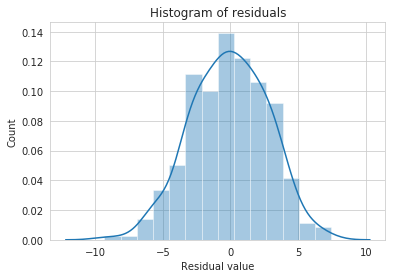

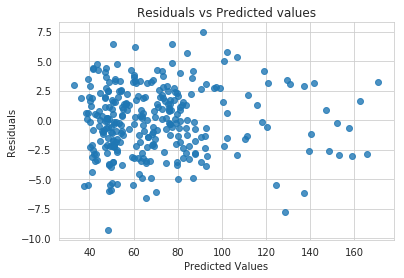

In [31]:
# using the polynomial regression to define and fit. 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

poly_mod= make_pipeline(PolynomialFeatures(4),
                        linear_model.LinearRegression())
poly_mod.fit(X_train,y_train)
scores = poly_mod.predict(X_test)
print_metrics(y_test,scores)
print_evalute(y_test, scores)
hist_residue(y_test,scores)
plot_residue(y_test,scores)

Comparing the polynomial feature to the linear regression. It can be seen that polynomial regression performs beter. The R2 and adj. R2 shows a good residual distrubution and also the histogram shows a form of a normal distribution. 
Due to this I will expore other model to see how best it goes.

In [32]:
# Running the gridCV for the GradientBoostingRegessor
# to choose the best parameter for the GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
gbrt_mod= GradientBoostingRegressor(random_state=0)
param_grid= {
    'n_estimators': [10,20,30,40,50,100,200,300,500],
    'max_features': ['auto'],
    'max_depth': [1,2,4,6,8,10],
    'learning_rate': [0.1],
    'subsample': [1]
}
gbrt_clf= ms.GridSearchCV(estimator=gbrt_mod, 
                          param_grid=param_grid,
                         n_jobs=4,
                         cv=5,
                         scoring='neg_mean_squared_error')
gbrt_clf.fit(X_train,y_train)
print(gbrt_clf.best_score_)
print(gbrt_clf.best_params_)

-9.746757215191346
{'learning_rate': 0.1, 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 200, 'subsample': 1}


Mean Square Error      = 9.259138303535538
Root Mean Square Error = 3.042883222132512
Mean Absolute Error    = 2.4327966433305996
Median Absolute Error  = 2.119264615257041
R^2                    = 0.9871148522752397
Adjusted R^2           = 0.986529163742296
Model Performance
Average Error: 2.4328 degrees.
Accuracy= 96.11%.


/usr/lib/python3/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


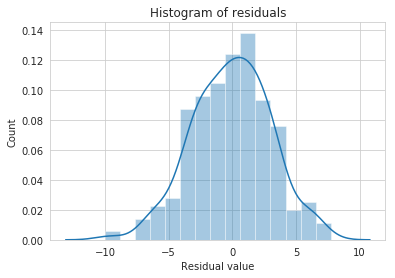

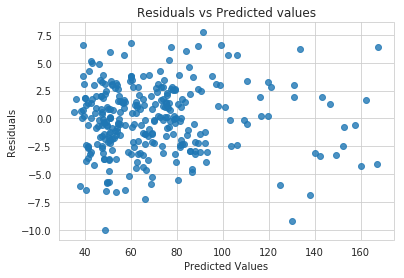

In [33]:
# Using the GradientBoostingRegessor Tree 
from sklearn.ensemble import GradientBoostingRegressor
gbrt_mod= GradientBoostingRegressor(n_estimators=200,
                                   max_depth=4)
gbrt_mod.fit(X_train,y_train)
scores=  gbrt_mod.predict(X_test)
print_metrics(y_test,scores)
print_evalute(y_test, scores)
hist_residue(y_test,scores)
plot_residue(y_test,scores)

Mean Square Error      = 8.100806569138946
Root Mean Square Error = 2.8461915903780874
Mean Absolute Error    = 2.296191108436508
Median Absolute Error  = 2.1082752324486655
R^2                    = 0.9887268030877984
Adjusted R^2           = 0.9882143850463346
Model Performance
Average Error: 2.2962 degrees.
Accuracy= 96.32%.


/usr/lib/python3/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


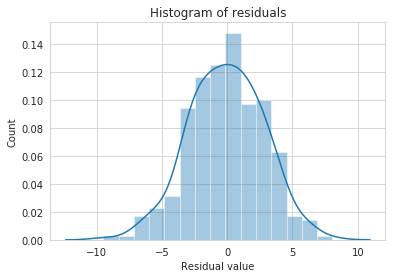

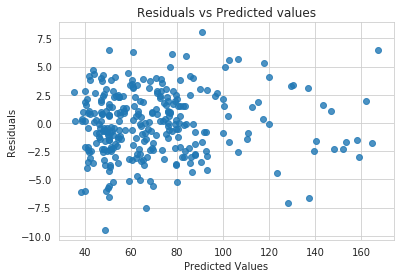

In [34]:
# Using Neural network 
from sklearn.neural_network import MLPRegressor
regressor_mod= MLPRegressor(hidden_layer_sizes= (100,),
                           activation= 'tanh',
                           learning_rate= 'adaptive',
                           max_iter=1000,
                            random_state=9,
                           learning_rate_init=0.001)
regressor_mod.fit(X_train, y_train)
scores= regressor_mod.predict(X_test)
print_metrics(y_test,scores)
print_evalute(y_test, scores)
hist_residue(y_test,scores)
plot_residue(y_test,scores)

Mean Square Error      = 11.499512500000002
Root Mean Square Error = 3.391093112847243
Mean Absolute Error    = 2.744166666666666
Median Absolute Error  = 2.400000000000002
R^2                    = 0.9839971158797088
Adjusted R^2           = 0.9832697120560593
Model Performance
Average Error: 2.7442 degrees.
Accuracy= 95.66%.


/usr/lib/python3/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


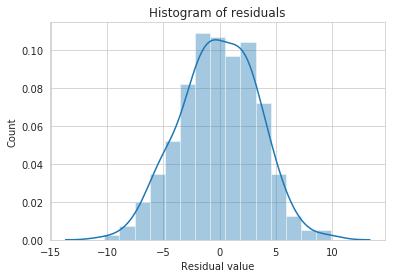

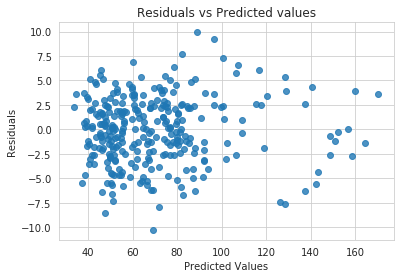

In [35]:
# Using Random Forest 
from sklearn.ensemble import RandomForestRegressor
rf_Regressor_mod= RandomForestRegressor(n_estimators=40)
rf_Regressor_mod.fit(X_train, y_train)
scores= rf_Regressor_mod.predict(X_test)
print_metrics(y_test,scores)
print_evalute(y_test, scores)
hist_residue(y_test,scores)
plot_residue(y_test,scores)

In [36]:
# tunning Random Forest Regressor to get the best 
# parameters 
n_estimators= [int(x) for x in np.linspace(10,500,10)]# # trees in random forest
max_features= ['auto','sqrt']# # features to consider at every split
max_depth= [int(x) for x in np.linspace(10,100,10)]# # maximum number of levels in tree
max_depth.append(None)
min_samples_split= [2,5,10] # minimum # samples required at each split a node
min_samples_leaf= [1,2,4] # minimum # of samples required at each leaf node
bootstrap= [True, False] # Method of selecting sample for training each tree 

param_distributions= {'n_estimators': n_estimators,
           'max_features': max_features,
           'max_depth': max_depth,
           'min_samples_split': min_samples_split,
           'min_samples_leaf': min_samples_leaf,
           'bootstrap': bootstrap}

rf_Regressor_mod= RandomForestRegressor()
rf_Regressor_clf= ms.RandomizedSearchCV(estimator= rf_Regressor_mod,
                                        param_distributions= param_distributions,
                                       n_iter= 100,
                                       cv=3,
                                       random_state=42,
                                       n_jobs=-1)
rf_Regressor_clf.fit(X_train,y_train)
print('\n')
print(rf_Regressor_clf.best_score_)
print(rf_Regressor_clf.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A



0.9860394267493952
{'n_estimators': 445, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}


Mean Square Error      = 9.571726313153945
Root Mean Square Error = 3.093820665965296
Mean Absolute Error    = 2.4688942994223027
Median Absolute Error  = 2.1969817511908794
R^2                    = 0.9866798503831755
Adjusted R^2           = 0.9860743890369562
Model Performance
Average Error: 2.4689 degrees.
Accuracy= 96.04%.


/usr/lib/python3/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


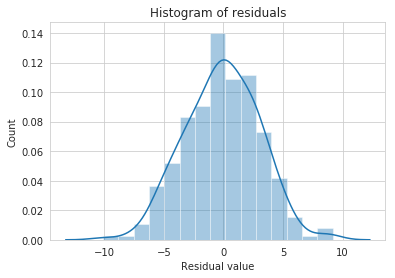

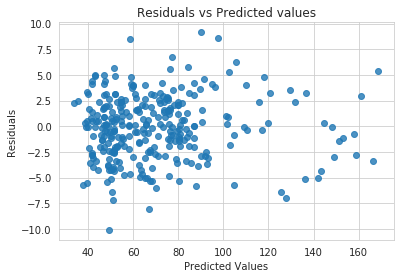

In [37]:
from sklearn.ensemble import RandomForestRegressor
rf_Regressor_mod= RandomForestRegressor(n_estimators= 227,
                                       min_samples_split= 5,
                                       min_samples_leaf= 1,
                                       max_features= 'auto',
                                       max_depth= 10,
                                       bootstrap= 'True')
rf_Regressor_mod.fit(X_train, y_train)
scores= rf_Regressor_mod.predict(X_test)
print_metrics(y_test,scores)
print_evalute(y_test, scores)
hist_residue(y_test,scores)
plot_residue(y_test,scores)

From all the models, it could be seen that ML regressor does good in general compared to the other models. 

In [38]:
# Testing the model on final test data 
# importing the final test data
final= pd.read_csv('Data/AW_test.csv')

# checking if there are duplicate 
print(final.shape)
print(final.CustomerID.unique().shape)


(500, 23)
(500,)


In [39]:
# calculate for age in age 
final['Age'] = generate_age(final,'%m/%d/%Y')
final[['Age','BirthDate']].head()

,Age,BirthDate
0,53,1/5/1945
1,33,10/4/1964
2,64,1/12/1934
3,39,9/22/1958
4,32,3/19/1965


In [40]:
encoded = encode_cat_features(final)
numeric_final_features = np.array(final[['Age','YearlyIncome', 'NumberChildrenAtHome']])
final_test = np.concatenate([encoded,numeric_final_features], 1)
final_test[:,11:13]= scaler.transform(final_test[:,11:13])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a Lab

In [42]:
final_scores= regressor_mod.predict(final_test)
np.savetxt('final_answer_regression.csv', final_scores, delimiter=',',fmt='%i')